# Requirements for Sentiment Analysis with python

# Create a Twitter developer account and use data source from Twitter
# Use UCM as the search keyword
# Use git to push a Jupitor Notebook with a readme file to GitHub
# Submit the github link to Blackboard.

# Step 1: Install required Libraries

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 11.1 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 23.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=49a9352ba1ba0b0d7f4013f5051f270ce04b5edc02fb762bd21c1b56548c985d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d322

In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API (tokens from my twitter account)

In [4]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  1000


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  176
negative number:  168
neutral number:  656


In [7]:
tweet_list[0:20]

,0
0,"RT @croquet_13: Btw, el Alto Evolucionador se ..."
1,RT @Indie5051: Oficialmente la mejor trilogía ...
2,RT @Indie5051: Oficialmente la mejor trilogía ...
3,RT @SitoCinema: #MarvelStudios hizo esta obra ...
4,@alexnahe Una joya de película es también Guar...
5,"@cabut01 @CavaNico Decir ""Prácticamente al bor..."
6,@daisyjonestour Ruim? Tá com pena? Kkkkk esse ...
7,RT @FormulaBeast54: bueno acabada Guardians of...
8,si me hubiera gustado ver a mar vell en el ucm 😿😿
9,RT @Indie5051: Oficialmente la mejor trilogía ...


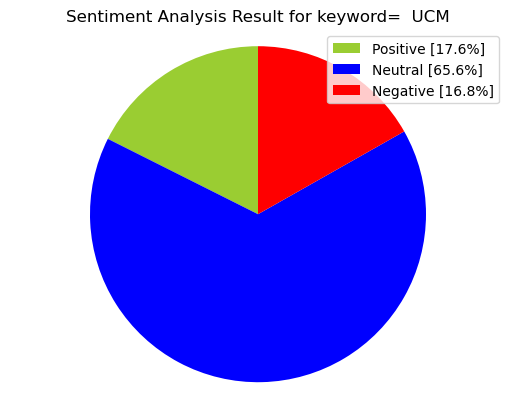

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @croquet_13: Btw, el Alto Evolucionador se ...","RT @croquet_13: Btw, el Alto Evolucionador se ..."
1,RT @Indie5051: Oficialmente la mejor trilogía ...,RT @Indie5051: Oficialmente la mejor trilogía ...
3,RT @SitoCinema: #MarvelStudios hizo esta obra ...,RT @SitoCinema: #MarvelStudios hizo esta obra ...
4,@alexnahe Una joya de película es también Guar...,@alexnahe Una joya de película es también Guar...
5,"@cabut01 @CavaNico Decir ""Prácticamente al bor...","@cabut01 @CavaNico Decir ""Prácticamente al bor..."
...,...,...
990,SPOILER | ¿Cuántas escenas post-créditos tiene...,SPOILER | ¿Cuántas escenas post-créditos tiene...
993,Além de mudarem 30 vezes o roteiro os caras nã...,Além de mudarem 30 vezes o roteiro os caras nã...
995,Huge thank you to everyone involved with the U...,Huge thank you to everyone involved with the U...
998,RT @cinegeekmx: Las dos mejores trilogías del ...,RT @cinegeekmx: Las dos mejores trilogías del ...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @croquet_13: Btw, el Alto Evolucionador se ...",btw el alto evolucionador se ha convertido e...
1,RT @Indie5051: Oficialmente la mejor trilogía ...,oficialmente la mejor trilog a del ucm
3,RT @SitoCinema: #MarvelStudios hizo esta obra ...,marvelstudios hizo esta obra maestra del g n...
4,@alexnahe Una joya de película es también Guar...,una joya de pel cula es tambi n guardianes d...
5,"@cabut01 @CavaNico Decir ""Prácticamente al bor...",decir pr cticamente al borde de la desapa...
6,@daisyjonestour Ruim? Tá com pena? Kkkkk esse ...,ruim t com pena kkkkk esse filme horr v...
7,RT @FormulaBeast54: bueno acabada Guardians of...,bueno acabada guardians of the galaxy vol 3 ...
8,si me hubiera gustado ver a mar vell en el ucm 😿😿,si me hubiera gustado ver a mar vell en el ucm
11,RT @JOAOGUILLL: #GuardiansOfTheGalaxyVol3 Não ...,guardiansofthegalaxyvol3 n o sei como tem ge...
13,RT @Wargeadicto: Guardians of the Galaxy Vol. ...,guardians of the galaxy vol 3 es la mejor pe...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_8901/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @croquet_13: Btw, el Alto Evolucionador se ...",btw el alto evolucionador se ha convertido e...,0.0,0.0,positive,0.000,0.893,0.107,0.3400
1,RT @Indie5051: Oficialmente la mejor trilogía ...,oficialmente la mejor trilog a del ucm,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,RT @SitoCinema: #MarvelStudios hizo esta obra ...,marvelstudios hizo esta obra maestra del g n...,0.0,0.0,negative,0.167,0.730,0.103,-0.3612
4,@alexnahe Una joya de película es también Guar...,una joya de pel cula es tambi n guardianes d...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
5,"@cabut01 @CavaNico Decir ""Prácticamente al bor...",decir pr cticamente al borde de la desapa...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
6,@daisyjonestour Ruim? Tá com pena? Kkkkk esse ...,ruim t com pena kkkkk esse filme horr v...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,RT @FormulaBeast54: bueno acabada Guardians of...,bueno acabada guardians of the galaxy vol 3 ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,si me hubiera gustado ver a mar vell en el ucm 😿😿,si me hubiera gustado ver a mar vell en el ucm,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
11,RT @JOAOGUILLL: #GuardiansOfTheGalaxyVol3 Não ...,guardiansofthegalaxyvol3 n o sei como tem ge...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
13,RT @Wargeadicto: Guardians of the Galaxy Vol. ...,guardians of the galaxy vol 3 es la mejor pe...,0.0,0.0,negative,0.104,0.896,0.000,-0.2960


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,296,54.51
positive,144,26.52
negative,103,18.97


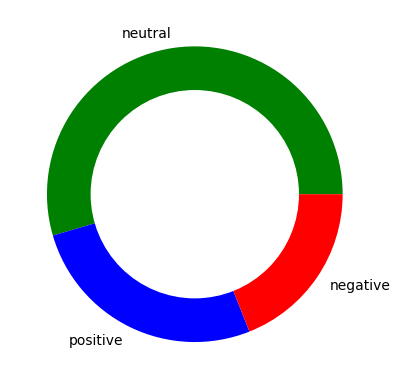

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()

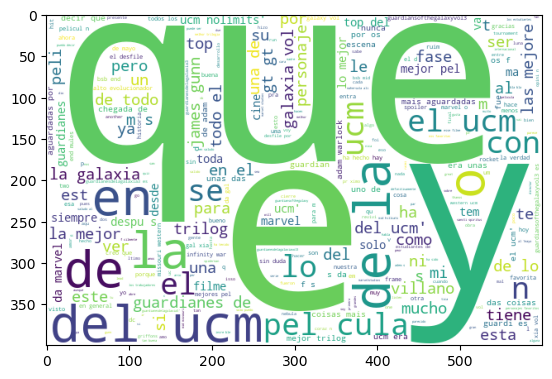

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

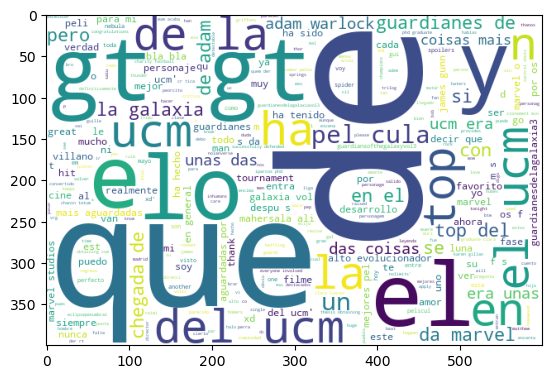

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

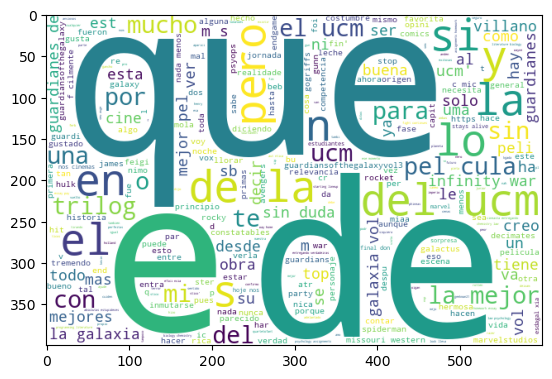

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

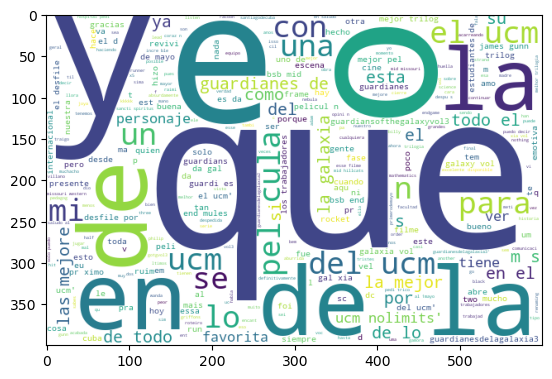

In [21]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)